Net(
  (hidden_layer): Linear(in_features=1, out_features=32, bias=True)
  (predict_layer): Linear(in_features=32, out_features=1, bias=True)
)


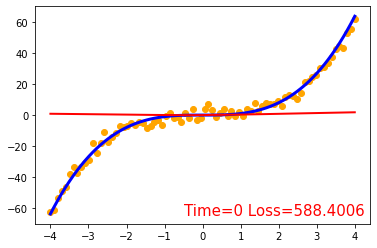

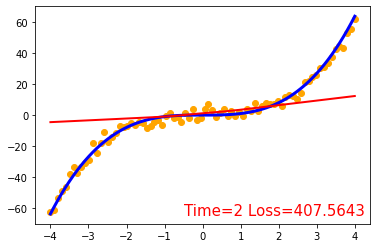

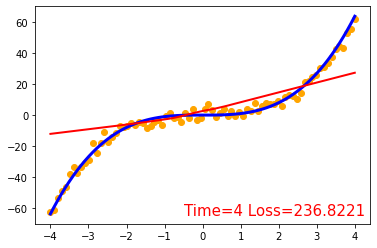

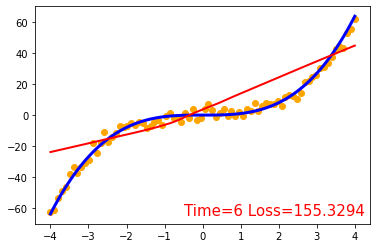

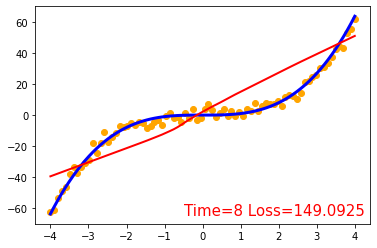

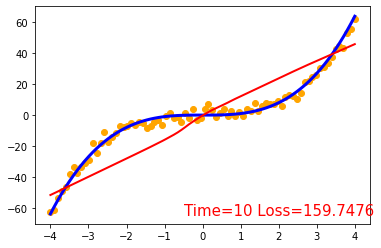

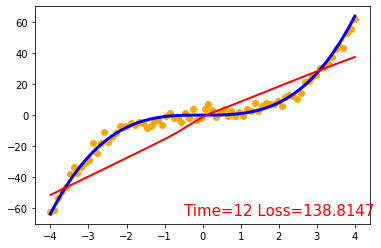

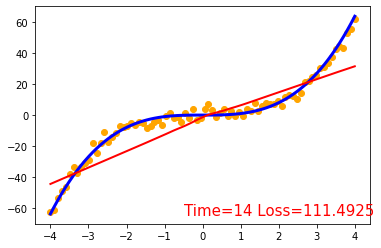

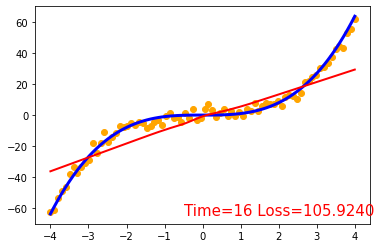

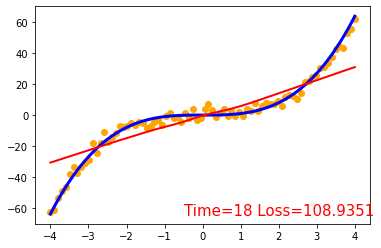

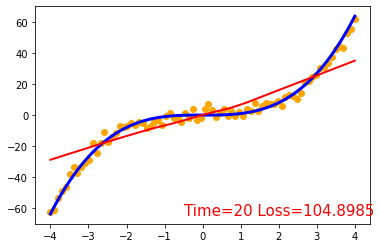

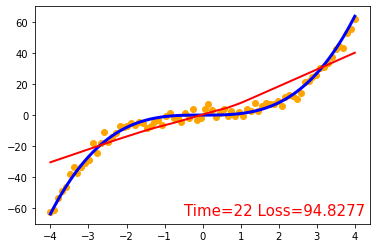

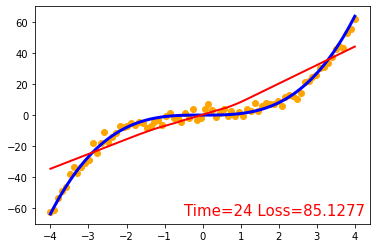

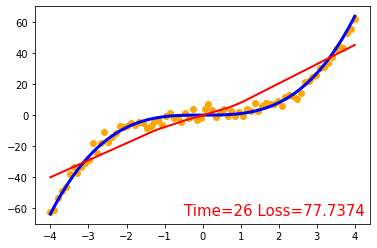

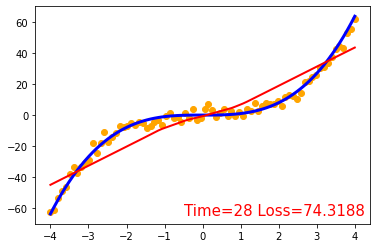

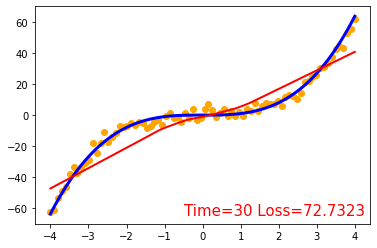

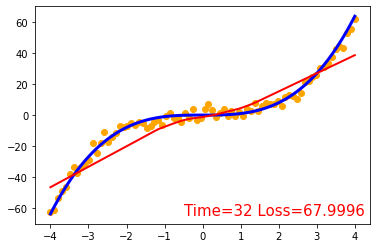

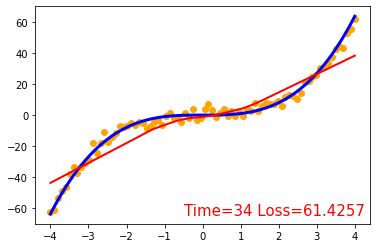

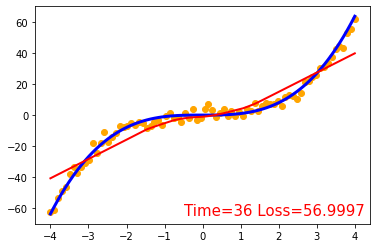

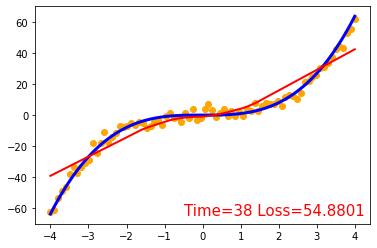

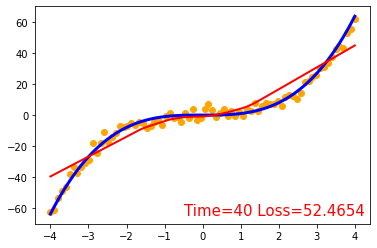

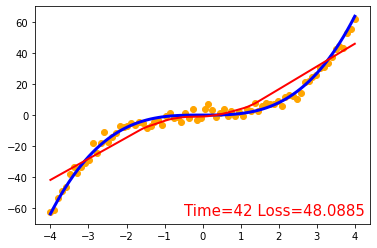

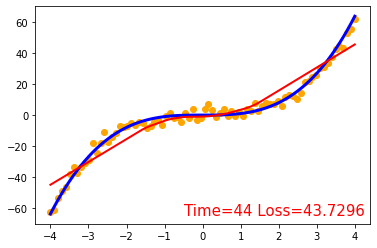

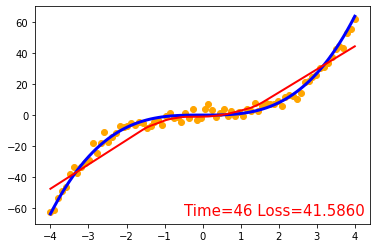

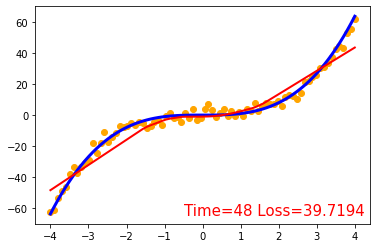

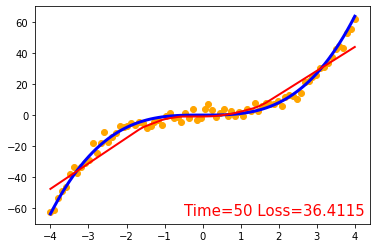

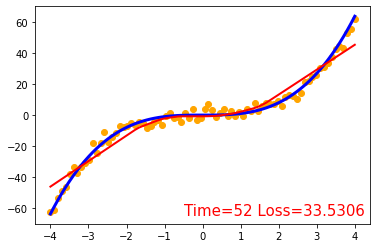

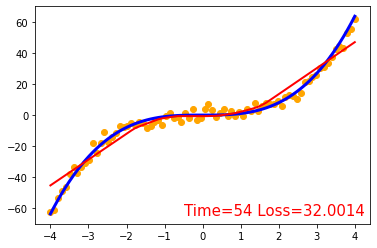

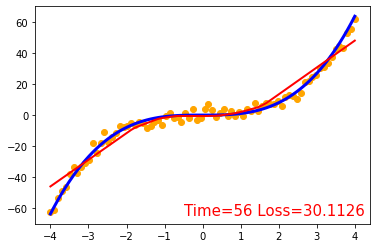

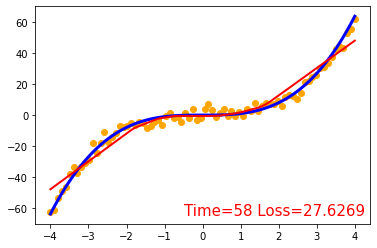

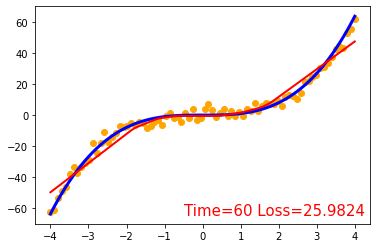

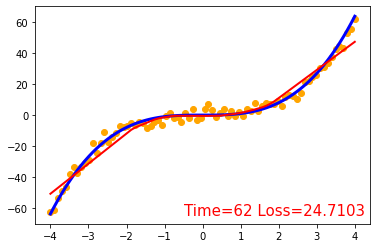

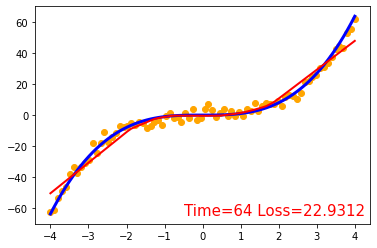

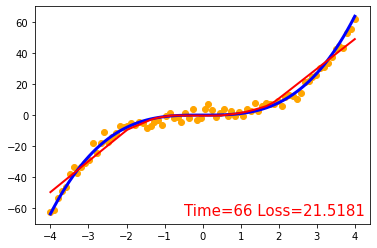

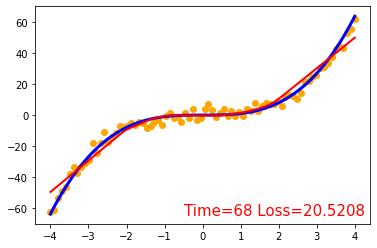

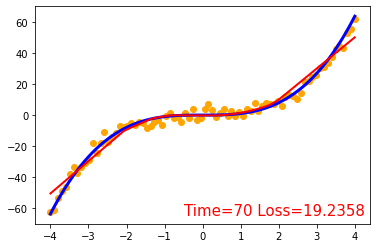

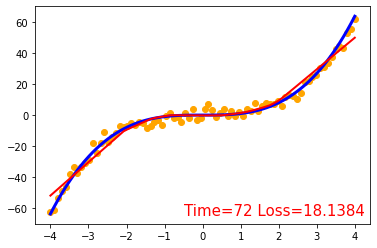

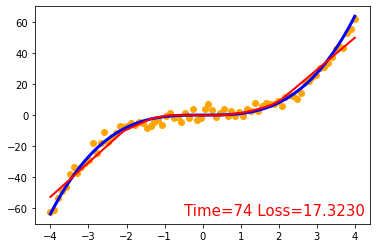

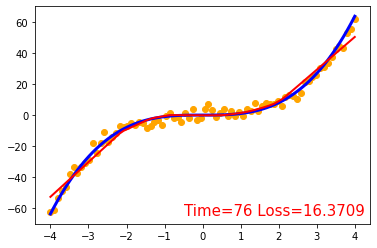

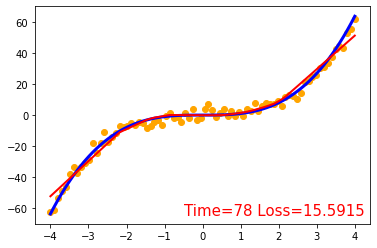

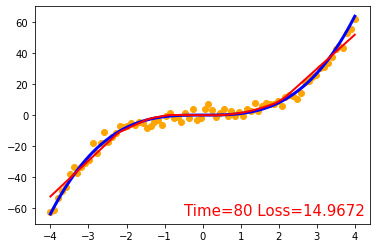

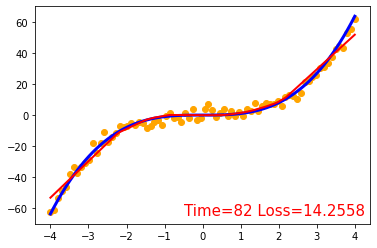

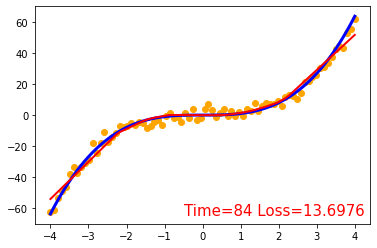

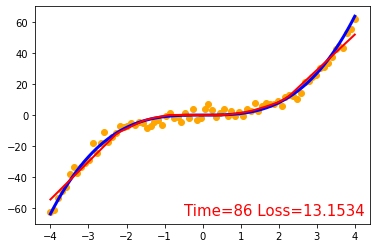

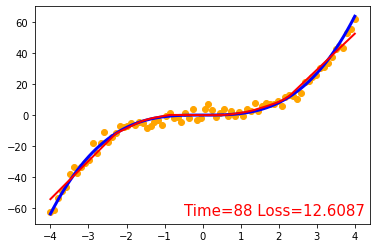

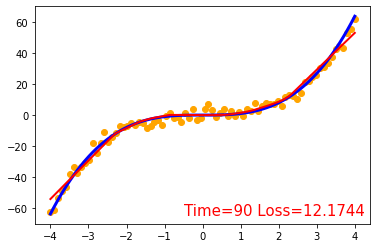

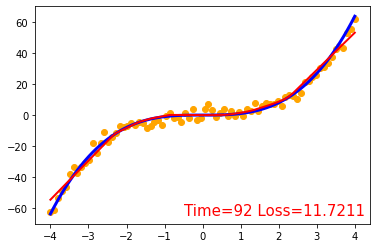

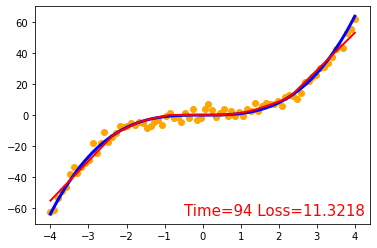

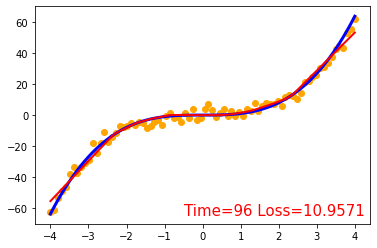

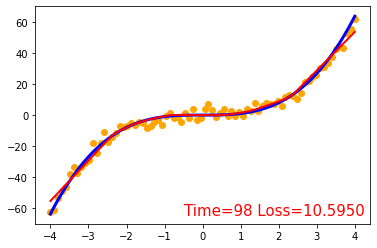

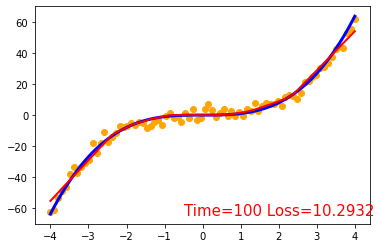

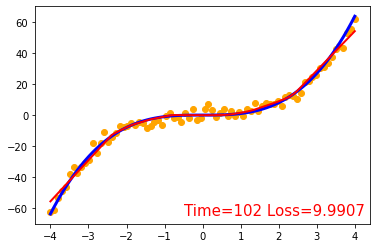

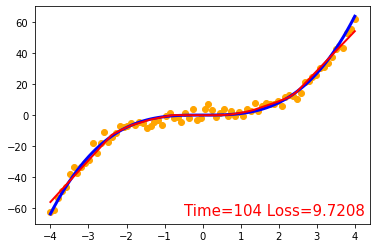

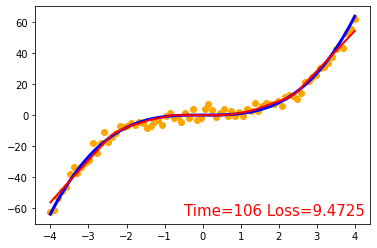

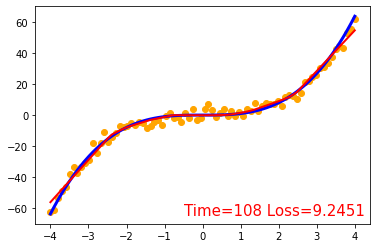

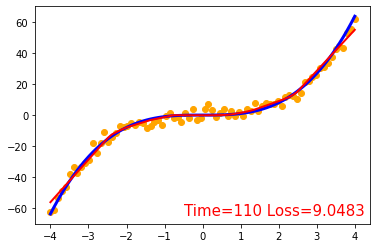

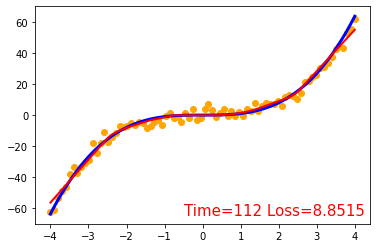

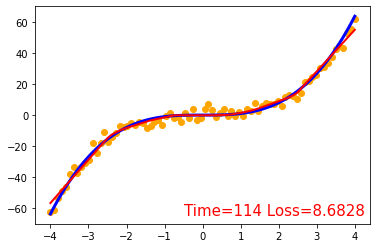

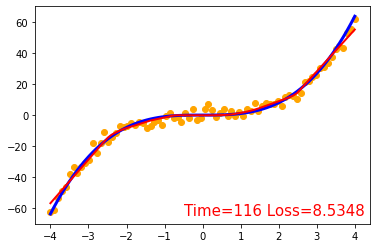

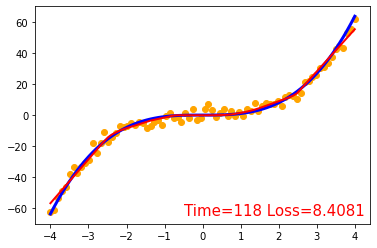

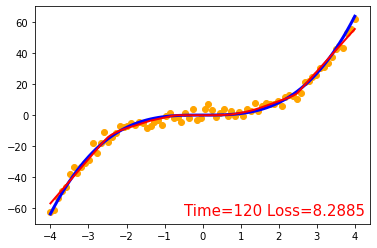

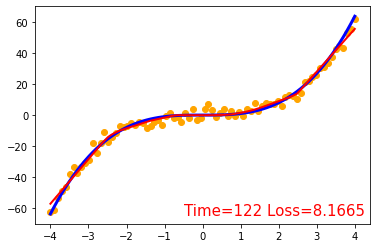

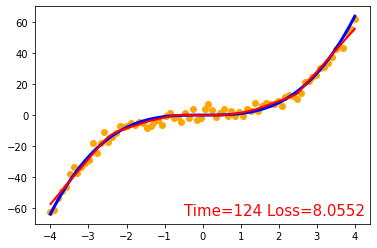

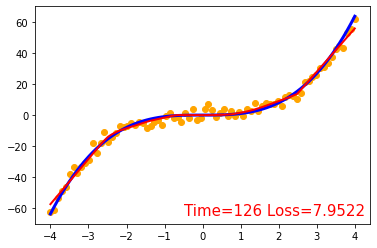

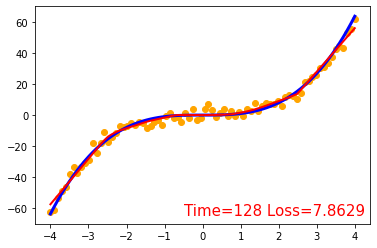

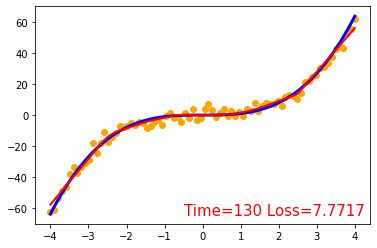

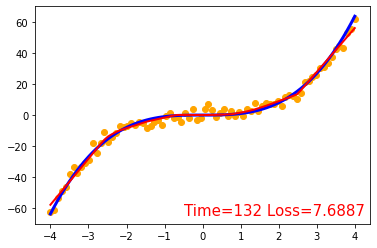

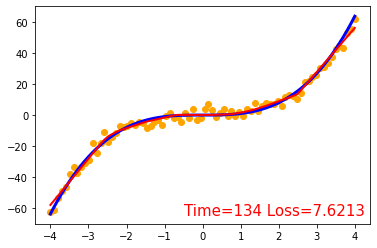

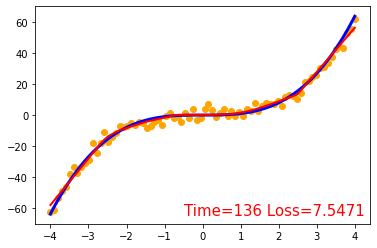

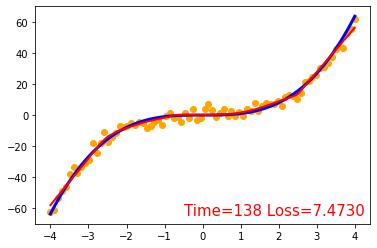

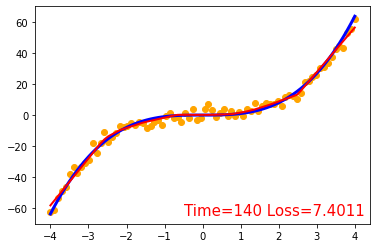

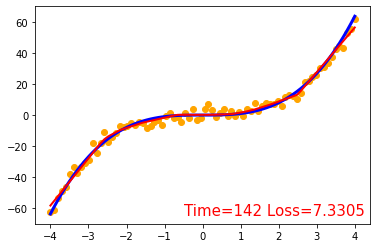

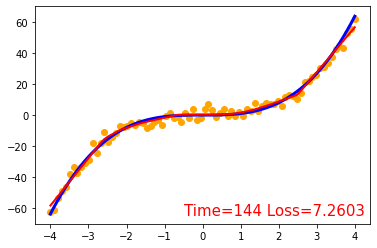

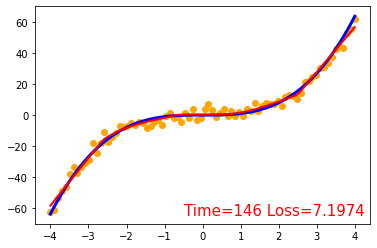

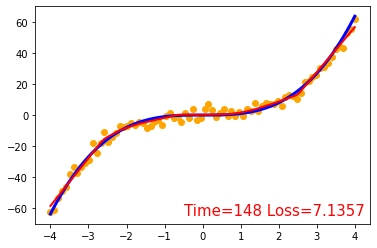

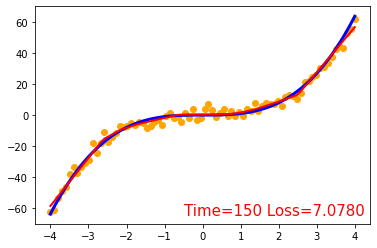

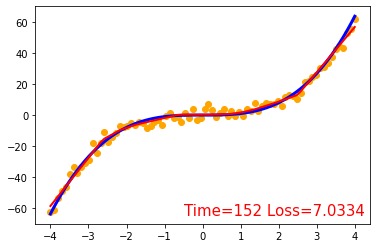

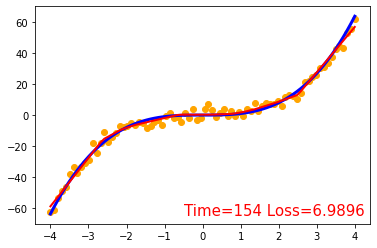

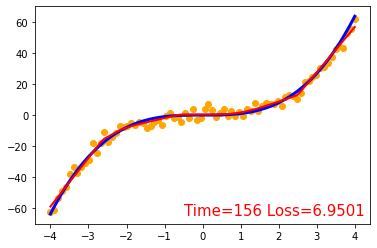

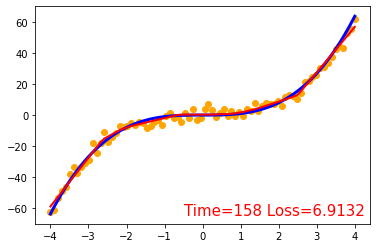

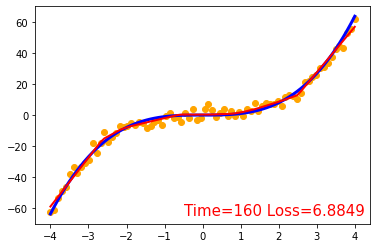

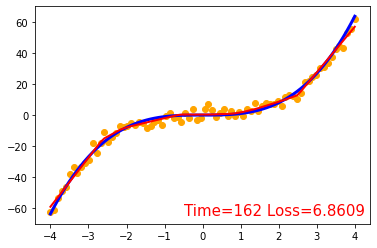

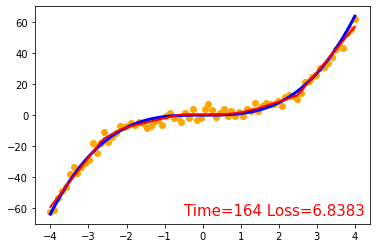

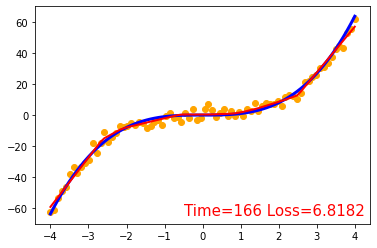

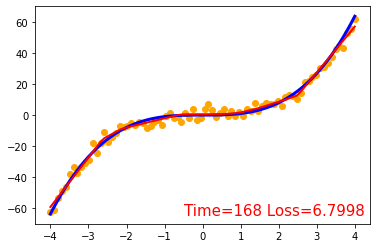

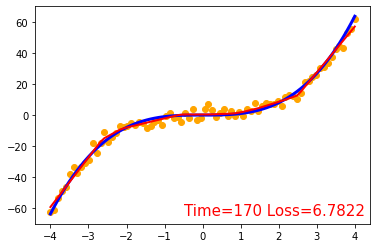

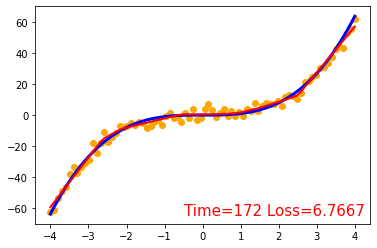

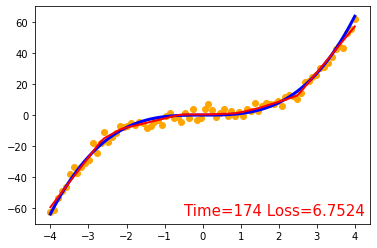

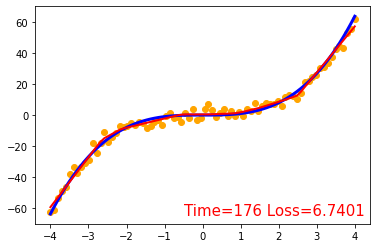

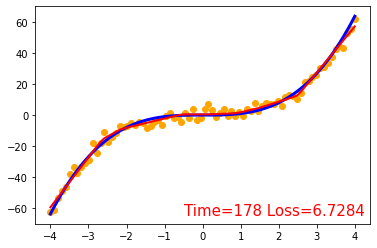

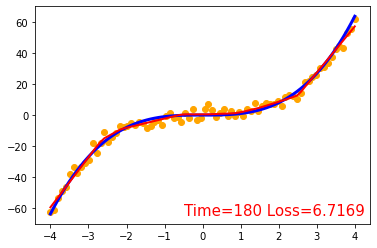

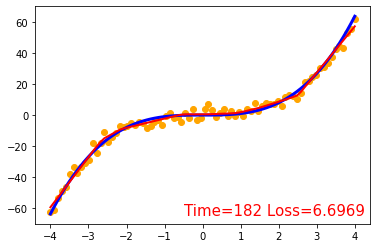

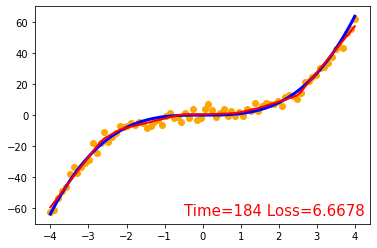

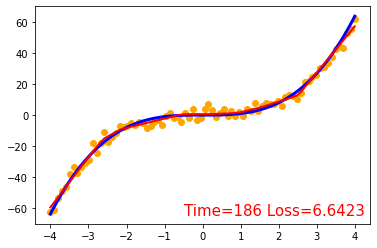

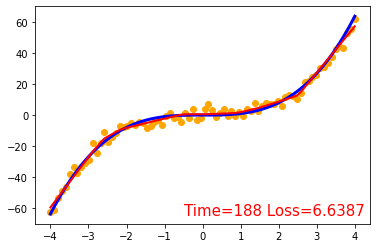

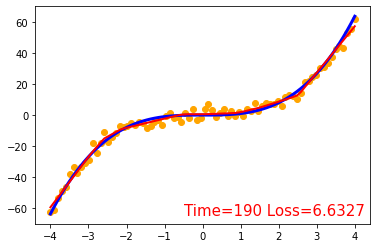

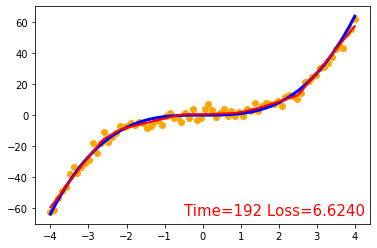

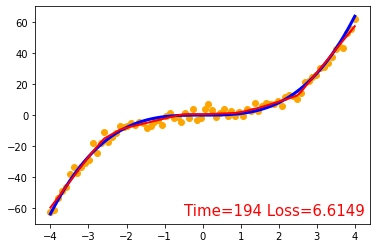

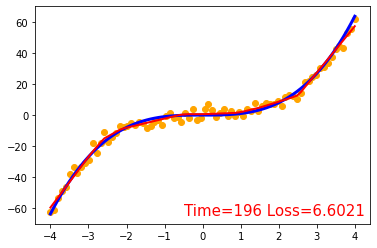

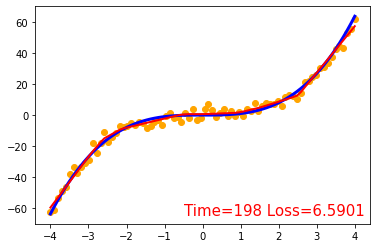

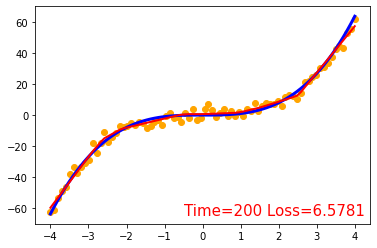

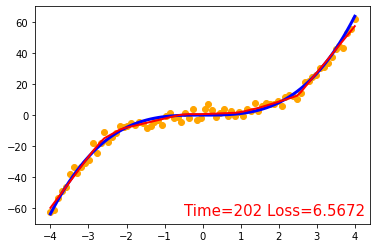

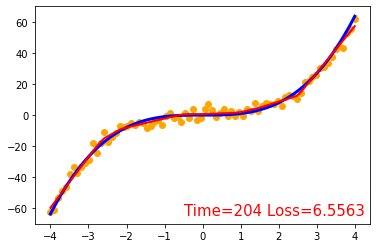

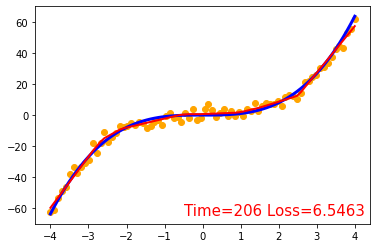

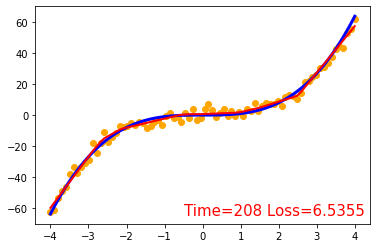

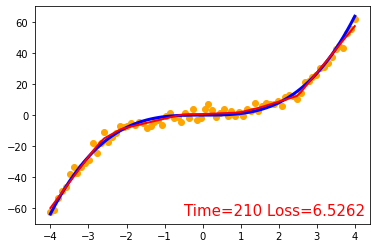

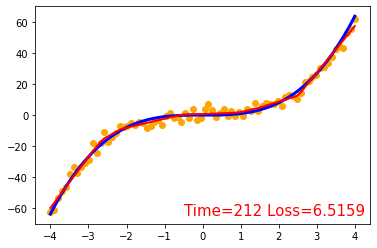

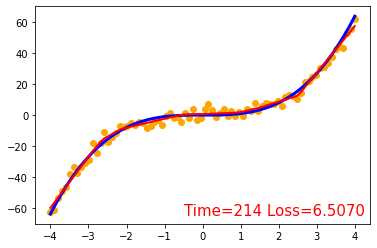

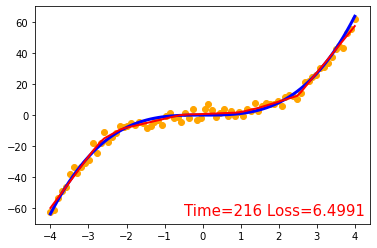

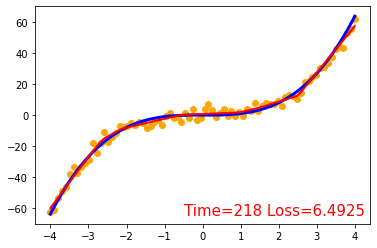

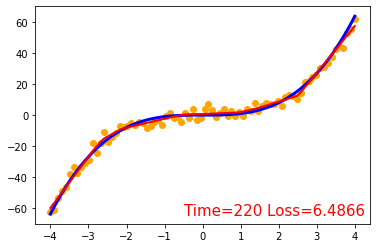

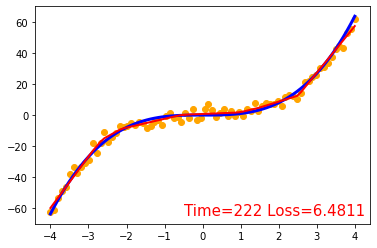

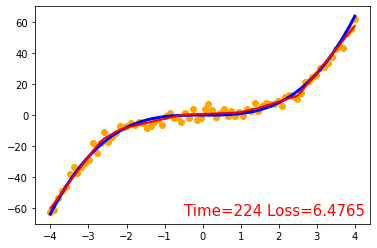

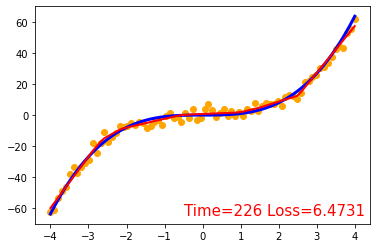

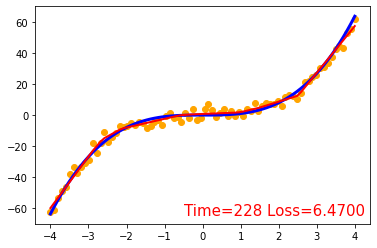

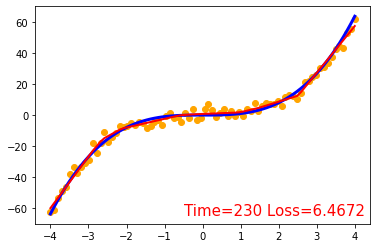

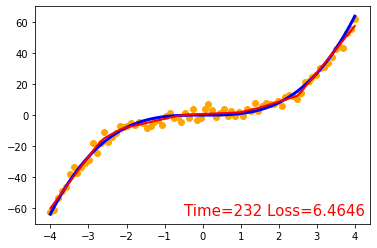

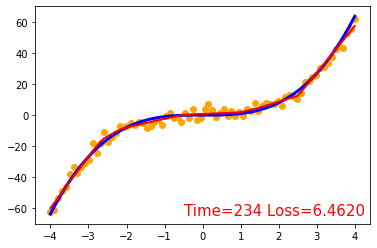

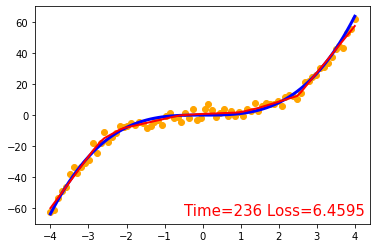

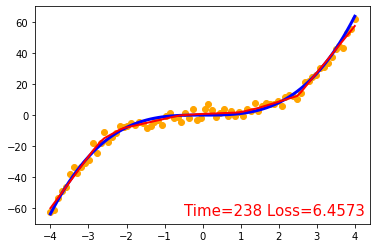

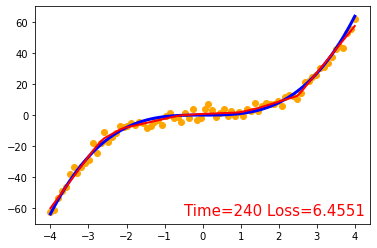

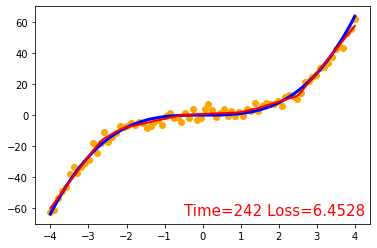

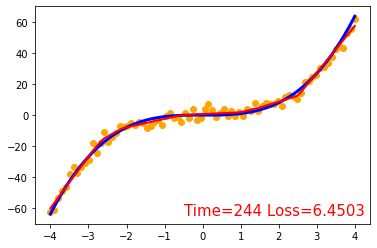

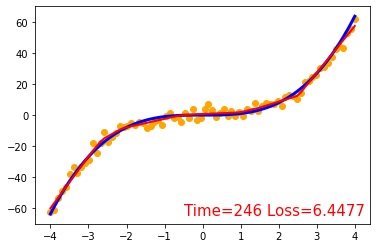

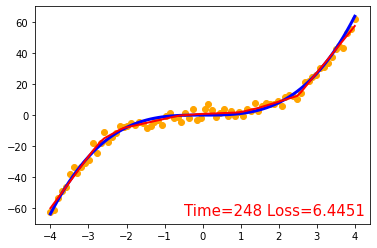

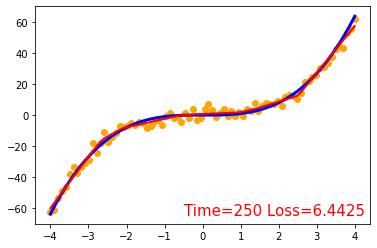

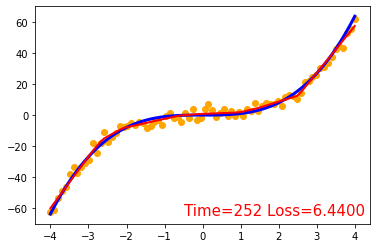

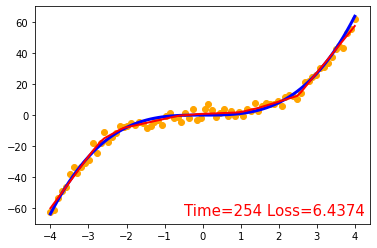

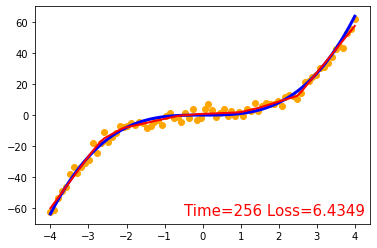

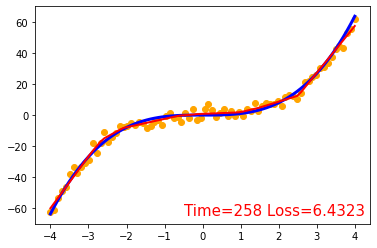

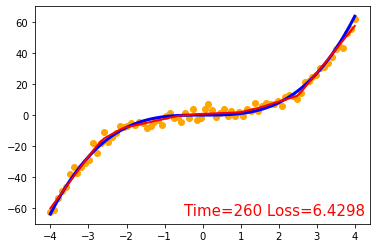

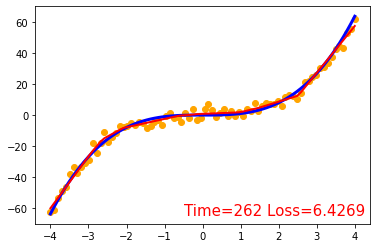

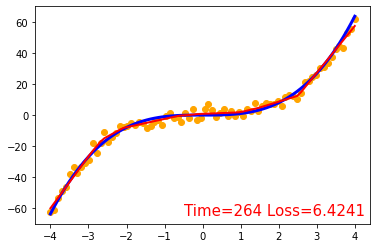

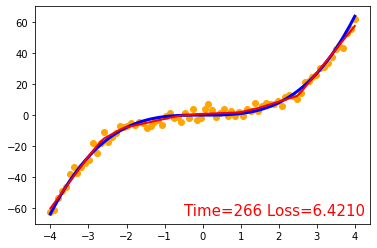

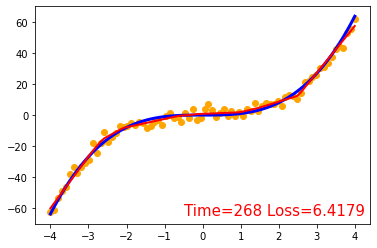

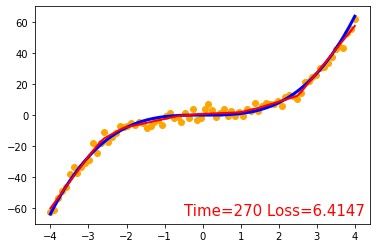

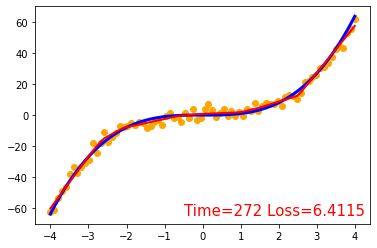

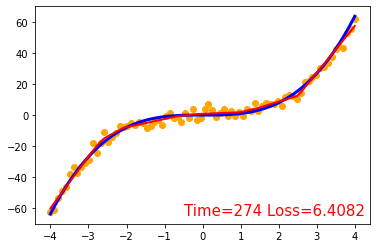

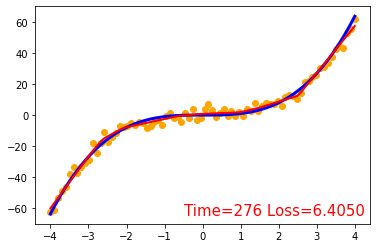

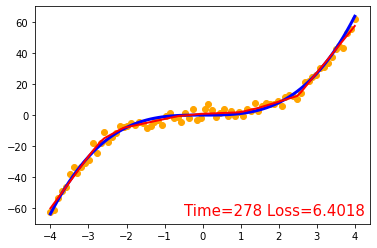

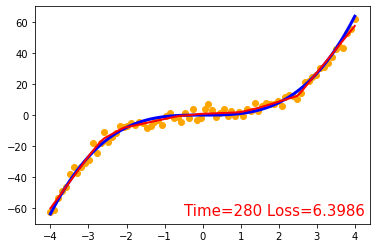

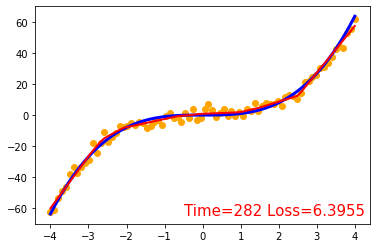

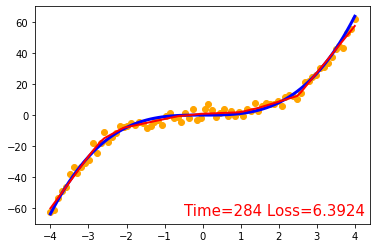

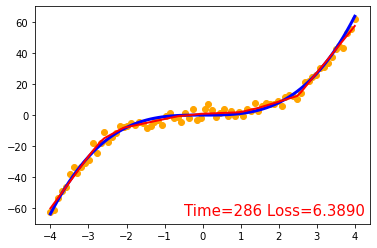

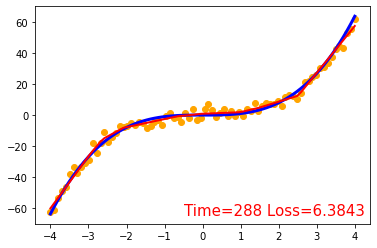

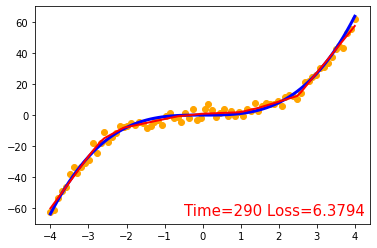

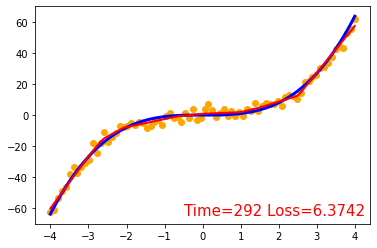

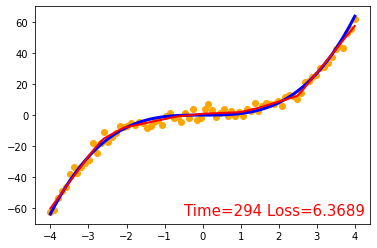

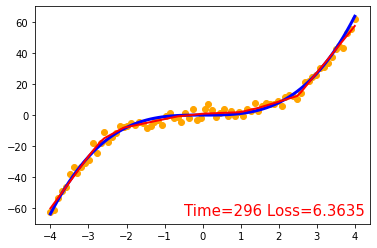

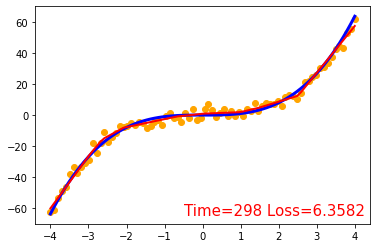

In [1]:
import torch
from matplotlib import pyplot as plt
import torch.nn.functional as F


# 自定义一个Net类，继承于torch.nn.Module类
# 这个神经网络的设计是只有一层隐含层，隐含层神经元个数可随意指定
class Net(torch.nn.Module):
    # Net类的初始化函数
    def __init__(self, n_feature, n_hidden, n_output):
        # 继承父类的初始化函数
        super(Net, self).__init__()
        # 网络的隐藏层创建，名称可以随便起
        self.hidden_layer = torch.nn.Linear(n_feature, n_hidden)
        # 输出层(预测层)创建，接收来自隐含层的数据
        self.predict_layer = torch.nn.Linear(n_hidden, n_output)

    # 网络的前向传播函数，构造计算图
    def forward(self, x):
        # 用relu函数处理隐含层输出的结果并传给输出层
        hidden_result = self.hidden_layer(x)
        relu_result = F.relu(hidden_result)
        predict_result = self.predict_layer(relu_result)
        return predict_result


# 训练次数
TRAIN_TIMES = 300
# 输入输出的数据维度，这里都是1维
INPUT_FEATURE_DIM = 1
OUTPUT_FEATURE_DIM = 1
# 隐含层中神经元的个数
NEURON_NUM = 32
# 学习率，越大学的越快，但也容易造成不稳定，准确率上下波动的情况
LEARNING_RATE = 0.1

# 数据构造
# 这里x_data、y_data都是tensor格式，在PyTorch0.4版本以后，也能进行反向传播
# 所以不需要再转成Variable格式了
# linspace函数用于生成一系列数据
# unsqueeze函数可以将一维数据变成二维数据，在torch中只能处理二维数据
x_data = torch.unsqueeze(torch.linspace(-4, 4, 80), dim=1)
# randn函数用于生成服从正态分布的随机数
y_data = x_data.pow(3) + 3 * torch.randn(x_data.size())
y_data_real = x_data.pow(3)

# 建立网络
net = Net(n_feature=INPUT_FEATURE_DIM, n_hidden=NEURON_NUM, n_output=OUTPUT_FEATURE_DIM)
print(net)

# 训练网络
# 这里也可以使用其它的优化方法
optimizer = torch.optim.Adam(net.parameters(), lr=LEARNING_RATE)
# 定义一个误差计算方法
loss_func = torch.nn.MSELoss()

for i in range(TRAIN_TIMES):
    # 输入数据进行预测
    prediction = net(x_data)
    # 计算预测值与真值误差，注意参数顺序问题
    # 第一个参数为预测值，第二个为真值
    loss = loss_func(prediction, y_data)

    # 开始优化步骤
    # 每次开始优化前将梯度置为0
    optimizer.zero_grad()
    # 误差反向传播
    loss.backward()
    # 按照最小loss优化参数
    optimizer.step()

    # 可视化训练结果
    if i % 2 == 0:
        # 清空上一次显示结果
        plt.cla()
        # 无误差真值曲线
        plt.plot(x_data.numpy(), y_data_real.numpy(), c='blue', lw='3')
        # 有误差散点
        plt.scatter(x_data.numpy(), y_data.numpy(), c='orange')
        # 实时预测的曲线
        plt.plot(x_data.numpy(), prediction.data.numpy(), c='red', lw='2')
        plt.text(-0.5, -65, 'Time=%d Loss=%.4f' % (i, loss.data.numpy()), fontdict={'size': 15, 'color': 'red'})
        plt.pause(0.1)

In [3]:
prediction

tensor([[-60.4049],
        [-56.9862],
        [-53.5674],
        [-50.1487],
        [-46.7299],
        [-43.3112],
        [-39.8925],
        [-36.4737],
        [-33.0550],
        [-29.6363],
        [-26.2175],
        [-23.1231],
        [-20.1586],
        [-17.1941],
        [-14.9778],
        [-13.6089],
        [-12.2399],
        [-10.8710],
        [ -9.5021],
        [ -8.1849],
        [ -7.6594],
        [ -7.1354],
        [ -6.6113],
        [ -6.0873],
        [ -5.5633],
        [ -5.0393],
        [ -4.5153],
        [ -3.9913],
        [ -3.4673],
        [ -2.9432],
        [ -2.4192],
        [ -1.8952],
        [ -1.3712],
        [ -0.8472],
        [ -0.6043],
        [ -0.3671],
        [ -0.0915],
        [  0.1842],
        [  0.4599],
        [  0.7356],
        [  0.9748],
        [  1.0732],
        [  1.1715],
        [  1.2699],
        [  1.3682],
        [  1.4666],
        [  1.5649],
        [  1.6633],
        [  1.7616],
        [  1.9008],
